<a href="https://colab.research.google.com/github/niklaust/Data_Science/blob/main/Data_Cleaning_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Data Cleaning</b></center></h1>

github:niklaust

#<center><b>1. Missing Data</b></center>

What does "missing data" mean?/ What is a missing value? 

It **depends on the origin of the data** and the **context it was generated**. 
  - For example, for a survey, a `Salary` field with a empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data." these concepts are related to the values that Python will consider "Falsy":

For Python, all the values belowed are considereed **"falsy:"**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
falsy_values = (0,      # Zero int     # it is depend for some kind of variable that doesn't have an absolute zero
                False,  # False boolean
                None,   # a null value
                '',     # empty string 
                [],     # empty list
                {}      # empty set
                )

In [ ]:
any(falsy_values)

False

## **1. nan**

Numpy has a special "nullable" value for numbers which is `np.nan`. It's *NaN*: Not a number

In [ ]:
np.nan

nan

The `np.nan` value is kind of a virus. Everything that is touches becomes `np.nan`:

It cannot do any operation with them they will give `np.nan`

In [ ]:
3 + np.nan

nan

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
a.sum()

nan

In [ ]:
a.mean()

nan

This is better than regular `None` values, which in the previous examples would have raise an exception:

In [ ]:
try:
  3 + None
except TypeError:
  print("Unsupported operand type(s)")


Unsupported operand type(s)


For a numeric array, the `None` value is replaced by `np.nan`:

In [ ]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [ ]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

As we said, `np.nan` is like a virus. If you have any `nan` value in an array and you try to perform an operation on it, you'll get unexpected results:

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

print(f"mean: {a.mean()}")
print(f"sum: {a.sum()}")

mean: nan
sum: nan


## **2. inf**

Numpy also supports an "Infinite" type:

In [ ]:
np.inf

inf

which also behaves as a virus:

In [ ]:
3 + np.inf

inf

In [ ]:
np.inf / 3

inf

In [ ]:
np.inf / np.inf

nan

In [ ]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=float)

In [ ]:
b.sum()

nan

## **2. Checking for `nan` or `inf`**

There are two functions: `np.isnan` and `np.isinf` that will perform the desired checks:

In [ ]:
np.isnan(np.nan)

True

In [ ]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`.

A finite number: **A countable number less than infinity, being the cardinality of a finite set**
  - i.e. some natural number, possibly 0

`np.isfinite`: works with all Real number

In [ ]:
#                  Real number    <-------------------- Exist on a number line
#                /             \
#       Rational Number      Irrational Number
#        /          \
#    Fractions    Integers 
#                 /      \
#            Negative  Whole Numbers
#                        /       \
#                     Zero     Natural Number
#                               

In [ ]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

In [ ]:
np.isfinite(-1)

True

In [ ]:
import math

np.isfinite(math.pi) # PI

True

In [ ]:
np.isfinite(math.e) # Euler's number

True

In [ ]:
try:
  np.isfinite(math.sqrt(-1))  # math will yield "Error" Before send it to isfinite 
except:
  print("Imaginary Number")

Imaginary Number


`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [ ]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [ ]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [ ]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

**Note:** it's not so common to find infinite values. From now on ,we'll keep working with only `np.nan`.

## **3. Filtering them out**

Whenever you'are trying to perform an operation with a Numpy array and you know there might be missing values, you'll need to filter them out before proceeding, to avoid `nan` propagation. We'll use a combination of the previous `np.isnan` + boolean arrays for this purpose:

In [ ]:
a = np.array([1 , 2, 3, np.nan, np.nan, 4])

In [ ]:
print(a[~np.isnan(a)])

[1. 2. 3. 4.]


In [ ]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [ ]:
# compare two lists in Python
import functools

a1 = a[~np.isnan(a)]
a2 = a[np.isfinite(a)]

# functiools.reduce() 
if functools.reduce(lambda x, y: x and y, map(lambda p, q: p == q, a1, a2), True):
  print("The lists a1 and a2 are the same")
else:
  print("The lists a1 and a2 are not the same")

The lists a1 and a2 are the same


And with that result, all the operation can be now performed:

In [ ]:
a[np.isfinite(a)].sum()

10.0

In [ ]:
a[np.isfinite(a)].mean()

2.5

#<center><b>2. Handling Missing Data</b></center>

pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing vlaues. Let's see one at a time:

In [ ]:
import numpy as np
import pandas as pd

## **1. Pandas Utility Functions**

Similarly to `numpy`, `pandas` also has a few utility funcitons to identify and detect null values:

`.isnull`: detect missing values for an array-like object.

`.isna`: detect missing values for an array-like object.

`.notna`: detect **non-missing** values for an array-like object.

`.notnull`: detect **non-missing** values for an array-like object.


In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

The opposite ones also exist:

In [ ]:
pd.notnull(None)

False

In [ ]:
pd.notnull(np.nan)

False

In [ ]:
pd.notna(np.nan)

False

In [ ]:
pd.notnull(42)

True

These functions also work with Series and `DataFrame`s:

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


## **2. Pandas Operations with Missing Values**

Pandas manages missing values more gracefully than numpy, `nan`s will no longer behave as "viruses", and operations will just ignore them completely:

In [ ]:
pd.Series([1, 2, np.nan]).count()

2

In [ ]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [ ]:
pd.Series([1, 2, np.nan]).mean()  # devided by number of values that can be counted

1.5

## **3. Filtering missing data**

As we saw with numpy, we could combine boolean selection + `pd.isnull` to filter out those `nan`s and null values:


In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both `notnull` and `isnull` are also methods of `Series` and `DataFrame`s, so we could use it that way:

In [ ]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

## **4. Dropping null values**

Boolean selection + `notnull()` seems a little bit verbose and repetitive. And as we said before: any reptitive task will probably have a better, more DRY way. In this case, we can use the `dropna` method:

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

## **5 Drapping null values on DataFrames**

You saw how simple it is to drop `na`s with a Series. But with `DataFrame`s, there will be a few morethings to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample `DataFrame`: 

In [ ]:
df = pd.DataFrame({
    'John': ["AB", np.nan, 89, np.nan],
    'David': ["A", 42, 92, np.nan],
    np.nan : [np.nan, 31, 52, 180],
    'Anna': ["O", 25, 50, 165],
}, index=['blood type', 'Age', 'weight(Kg)', 'Height(cm)' ])

In [ ]:
display(df)

,John,David,NaN,Anna
blood type,AB,A,NaN,O
Age,NaN,42,31.0,25
weight(Kg),89,92,52.0,50
Height(cm),NaN,NaN,180.0,165


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, blood type to Height(cm)
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   John    2 non-null      object 
 1   David   3 non-null      object 
 2   nan     3 non-null      float64
 3   Anna    4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 160.0+ bytes


In [ ]:
df.isnull()

,John,David,NaN,Anna
blood type,False,False,True,False
Age,True,False,False,False
weight(Kg),False,False,False,False
Height(cm),True,True,False,False


In [ ]:
df.isnull().sum()

John     2
David    1
NaN      1
Anna     0
dtype: int64

The default `dropna` behavior will drop all the rows in which any null value is present:

In [ ]:
df.dropna()

,John,David,NaN,Anna
weight(Kg),89,92,52.0,50


In this case we're dropping **rows.** Rows containing null values are dropped from the DF. You can also use the `axis` parameter to drop columns containing null values:

In [ ]:
df.dropna(axis=1) # axis = 1, "columns" 

,Anna
blood type,O
Age,25
weight(Kg),50
Height(cm),165


In [ ]:
df.dropna(axis=0) # axis = 0, "rows"

,John,David,NaN,Anna
weight(Kg),89,92,52.0,50


In this case, any row or column that contains **at least** one null value will be dropped. Which can be, depending on the case, too extreme, You can control this behavior with the `how` parameter. Canbe either `any` or `all`:

In [ ]:
df2 = df = pd.DataFrame({
    'John': ["AB", np.nan, 89, np.nan],
    'David': ["A", 42, 92, np.nan],
    np.nan : [np.nan, 31, 52, 180],
    'Anna': ["O", 25, 50, 165],
}, index=['blood type', 'Age', 'weight(Kg)', 'Height(cm)' ])

In [ ]:
df2

,John,David,NaN,Anna
blood type,AB,A,NaN,O
Age,NaN,42,31.0,25
weight(Kg),89,92,52.0,50
Height(cm),NaN,NaN,180.0,165


In [ ]:
df2.dropna(how='all')

,John,David,NaN,Anna
blood type,AB,A,NaN,O
Age,NaN,42,31.0,25
weight(Kg),89,92,52.0,50
Height(cm),NaN,NaN,180.0,165


In [ ]:
df2.dropna(how='any') # default behavior

,John,David,NaN,Anna
weight(Kg),89,92,52.0,50


You can also use the `thresh` parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept:

In [ ]:
df

,John,David,NaN,Anna
blood type,AB,A,NaN,O
Age,NaN,42,31.0,25
weight(Kg),89,92,52.0,50
Height(cm),NaN,NaN,180.0,165


In [ ]:
df.dropna(thresh=3)

,John,David,NaN,Anna
blood type,AB,A,NaN,O
Age,NaN,42,31.0,25
weight(Kg),89,92,52.0,50


In [ ]:
df.dropna(thresh=3, axis='columns')

,David,NaN,Anna
blood type,A,NaN,O
Age,42,31.0,25
weight(Kg),92,52.0,50
Height(cm),NaN,180.0,165


## **6. Filling null values**

Sometimes instead than dropping the null values, we might need to **replace them with some other values**. This highly **depends on your context and the dataset** you're currently working. Sometimes a `nan` can be replaced with a `0`, sometimes it can be replaced with the `mean` of the sample, and some other times you can take the closest values. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

### **Filling nulls with a arbitrary value**

In [ ]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s  # we didn't assign the value back to dataframe so the dataframe is still original

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

### **Filling nulls with contiguous(close) values**

The `method ` argument used to fill null values with other values close to that null one:

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.fillna(method='ffill') # "front fill" uses the value in the front to fill followed missing value

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='bfill') # "back fill" uses the value in the back to fill the previous missing value

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the Series/DataFrame:

In [ ]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method="ffill") # if there is a missing value in the first row. it will not work

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill') # the Series has a missing value in the last row. Back fill can't work in this situation

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

## **7. Filling null values on DataFrames**

The `fillna` method also works on `DataFrame`s and it works similarly. The main differences are that you can specify the `axis` (as usual, rows or columns) to use to fil the values (specially for methods) and that you have more control on the values passed:

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 42, np.nan],
    'Column B': [2, 8, 36, np.nan],
    'Column C': [np.nan, 9, 48, 100],
    'Column D': [5, 6, 40, 100],
})

df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,6
2,42.0,36.0,48.0,40
3,NaN,NaN,100.0,100


In [ ]:
df.fillna({
    'Column A': 0,
    'Column B': 99,
    'Column C': df['Column C'].mean(),
           })

,Column A,Column B,Column C,Column D
0,1.0,2.0,52.333333,5
1,0.0,8.0,9.000000,6
2,42.0,36.0,48.000000,40
3,0.0,99.0,100.000000,100


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,6
2,42.0,36.0,48.0,40
3,42.0,36.0,100.0,100


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,6
2,42.0,36.0,48.0,40
3,42.0,36.0,100.0,100


In [ ]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,6.0
2,42.0,36.0,48.0,40.0
3,NaN,NaN,100.0,100.0


## **8. Checking if there are NAs**

The question is: Does this `Series` or `DataFrame` contain any missing value? The answer should be yes or no: `True` or `False`. How can you verity it?

### **Example 1: Checking the length**

If there are missing values, `s.dropna()` will have less elements than `s`:

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna().count()

4

In [ ]:
missing_values = len(s.dropna()) != len(s)
missing_values 

True

There's also a count method, that excludes `nan`s from its result:

In [ ]:
len(s)

6

In [ ]:
s.count() # count() method doesn't count missing values

4

So we could just do:

In [ ]:
missing_values = s.count() != len(s)
missing_values

True

### **More Pythonic solution `any`**

The methods `any` and `all` check if either there's `any` True value in a Series or `all` the values are `True`. They work in the same way as in Python:

In [ ]:
pd.Series([True, False, False]).any() # just one 'True' will be true

True

In [ ]:
pd.Series([True, False, False]).all() # just one 'False make the series false

False

In [ ]:
pd.Series([True, True, True]).all() # all in the series must be 'True' will be true

True

The `isnull()` method returned a Boolean `Series` with `True` values wherever there was a `nan`:

In [ ]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

so We can just use the `any` method with the boolean array returned:

In [ ]:
pd.Series([1, np.nan]).isnull().any()

True

In [ ]:
pd.Series([1, 2]).isnull().any()

False

In [ ]:
s.isnull().any()

True

A more strict version would check only the `values` of the Series:

In [ ]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [ ]:
s.isnull().values.any() # just one of the series values that is null 

True

#<center><b>3. Cleaning not-null values</b></center>

After dealing with many datasets I can tell you that **"missing data"** is not such a big deal. The best thing that can happen is to clealy see values like `np.nan`. The only thing you need to do is just use methods like `isnull` and `fillna`/ `dropna` and pandas will take care off the rest.

But somethines, you can have invalid values that are not just "missing data" (`None`, or `nan`). For example:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})

df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous `DataFrame` doesn't have any "missing value", but clearly has **invalid data**. `290` doesn't seem like a valid age, and `D` and `?` don't correspond with any known sex category. 

How can you clean these not-missing, but clearly invalid values then?

## **1.Finding Unique Values**

The first step to clean invalid values is to **notice** them, then **identify** them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present, For that, we use the `unique()` method:

In [ ]:
df # Sex refer to human comosome 'Male' or 'Female', Gender might be other things 

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [ ]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

Clearly if you see values like 'D' or '?', it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survay company and they told you that `D` was a typo and it should actually be `F`. You can use the `replace` function to replace these values:

In [ ]:
df['Sex'].replace('D', 'F') # replace 'D' with 'F' in Sex column

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few `N`s, that should actually be `M`s:

In [ ]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [ ]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290:29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, `150>15`, `490>49`).



The first step would be to just set the limit of the "not possible" age. Is it 100? 120? let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [ ]:
df[df['Age']>100]  # filter data set with error value to see if there any error value in dataset

,Sex,Age
3,D,290


And we can now just divided by 10:

In [ ]:
# 1. left: find location in dataframe if 'Age' over than 100 
# 2. right: find location in dataframe if 'Age' over than 100 then devided by 10 
# 3. from the right to left: assign the values back to 1. 

df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10 

In [ ]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


## **2.Duplicates**

Checking duplicate values is extremely simple. It's behave differently between Series and DataFrames. 


In [ ]:
Geography = pd.Series([
    'Rome',
    'Berlin',
    'Gamla Uppsala',    # 3rd to 4th century Ad
    'Stockholm',        # 1436
    'Madrid',           # 1561
    'Amsterdam',        # 1814
    'Turin',            # 1861
    'Florence',         # 1865 to 1871
    'Rome',             # 1871
    'Bonn',             # 1949 to 1990
    'Berlin',           # 1990
], index=[
    'Italy',
    'Germany',
    'Sweden',
    'Sweden',
    'Spain',
    'The netherland',
    'Italy',
    'Italy',
    'Italy',
    'Germany',
    'Germany',
])

In [ ]:
Geography

Italy                      Rome
Germany                  Berlin
Sweden            Gamla Uppsala
Sweden                Stockholm
Spain                    Madrid
The netherland        Amsterdam
Italy                     Turin
Italy                  Florence
Italy                      Rome
Germany                    Bonn
Germany                  Berlin
dtype: object

The two most important methods to deal with duplicates are `duplicated` (that will tell you which values are duplicates) and `drop_duplicates` (which will just get rid of duplicates):

keep =  , default `first` : 
* `first` : Mark duplicates as `True` except for the first occurrence.
* `last` : Mark duplicates as `True` except for the last occurrence.
* `False`: Mark all duplicates as `True`

In [ ]:
Geography.duplicated()

Italy             False
Germany           False
Sweden            False
Sweden            False
Spain             False
The netherland    False
Italy             False
Italy             False
Italy              True
Germany           False
Germany            True
dtype: bool

By default, it'll consider the first occurence of the value as not-duplicate. you can change this behavior with the `keep` parameter:

In [ ]:
Geography.duplicated(keep='last') # last will make the last value as not duplicated

Italy              True
Germany            True
Sweden            False
Sweden            False
Spain             False
The netherland    False
Italy             False
Italy             False
Italy             False
Germany           False
Germany           False
dtype: bool

keep

In [ ]:
Geography.duplicated(keep=False)

Italy              True
Germany            True
Sweden            False
Sweden            False
Spain             False
The netherland    False
Italy             False
Italy             False
Italy              True
Germany           False
Germany            True
dtype: bool

In [ ]:
Geography.drop_duplicates()

Italy                      Rome
Germany                  Berlin
Sweden            Gamla Uppsala
Sweden                Stockholm
Spain                    Madrid
The netherland        Amsterdam
Italy                     Turin
Italy                  Florence
Germany                    Bonn
dtype: object

In [ ]:
Geography.drop_duplicates(keep='last')

Sweden            Gamla Uppsala
Sweden                Stockholm
Spain                    Madrid
The netherland        Amsterdam
Italy                     Turin
Italy                  Florence
Italy                      Rome
Germany                    Bonn
Germany                  Berlin
dtype: object

In [ ]:
Geography.drop_duplicates(keep=False)

Sweden            Gamla Uppsala
Sweden                Stockholm
Spain                    Madrid
The netherland        Amsterdam
Italy                     Turin
Italy                  Florence
Germany                    Bonn
dtype: object

**Duplicates in DataFrames**

Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [ ]:
Countries = pd.DataFrame({
    'Countries': ['Italy', 'Spain', 'Germany', 'The Netherland', 'Sweden', 'Italy', 'Germany'],
    'Flowers': ['Lily', 'Red Carnation', 'Cornflower', 'Tulip', 'Twinflower', 'np.nan', 'Cornflower'],
    'The highest mountains': ['Monte Bianco', 'Mulhacén', 'Zugspitze', 'Vaalserberg', 'Kebnekaise', 'Monte Rosa', 'Zugspitze']   
})

Countries

,Countries,Flowers,The highest mountains
0,Italy,Lily,Monte Bianco
1,Spain,Red Carnation,Mulhacén
2,Germany,Cornflower,Zugspitze
3,The Netherland,Tulip,Vaalserberg
4,Sweden,Twinflower,Kebnekaise
5,Italy,np.nan,Monte Rosa
6,Germany,Cornflower,Zugspitze


`duplicated` on DataFrame said that every values in the row must be the same then the `duplicated` will be `True`

In [ ]:
Countries.duplicated()  # 2rd row and 6th row are the same but 0th and 5th have one different value

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Again, conceptually, `duplicated` means all the columns values should be duplicates. We ca ncustom this with the `subset` parameter:

In [ ]:
Countries.duplicated(subset=['Countries'])

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

And the same rules of `keep` still apply:

In [ ]:
Countries.duplicated(subset=['Countries'], keep='last')

0     True
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

`drop_duplicates` takes the same parameters:

In [ ]:
Countries.drop_duplicates()

,Countries,Flowers,The highest mountains
0,Italy,Lily,Monte Bianco
1,Spain,Red Carnation,Mulhacén
2,Germany,Cornflower,Zugspitze
3,The Netherland,Tulip,Vaalserberg
4,Sweden,Twinflower,Kebnekaise
5,Italy,np.nan,Monte Rosa


In [ ]:
Countries.drop_duplicates(subset=['Countries'])

,Countries,Flowers,The highest mountains
0,Italy,Lily,Monte Bianco
1,Spain,Red Carnation,Mulhacén
2,Germany,Cornflower,Zugspitze
3,The Netherland,Tulip,Vaalserberg
4,Sweden,Twinflower,Kebnekaise


In [ ]:
Countries = Countries.drop_duplicates(subset=['Countries'], keep='first')
Countries

,Countries,Flowers,The highest mountains
0,Italy,Lily,Monte Bianco
1,Spain,Red Carnation,Mulhacén
2,Germany,Cornflower,Zugspitze
3,The Netherland,Tulip,Vaalserberg
4,Sweden,Twinflower,Kebnekaise


## **3.Text Handling**

Cleaning text values can be incredibly hard, Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases: 

**Splitting Columns**


In [ ]:
df0 = pd.DataFrame({
    'Poet':[
        'Dante_Alighieri_1495_Florence',
        'William_Shakespeare_1564_Stratford-upon-Avon',
        'Johann_wolfgang_von_Goethe_1749_Frankfurt',
        'Miguel_de_Cervantes_Saavedra_1547_Alcalá_de_Henares',
        'Joost_van_den_Vondel_1587_Cologne', 
        'Johan_August_Strindberg_1849_Stockholm']    
})

df0

,Poet
0,Dante_Alighieri_1495_Florence
1,William_Shakespeare_1564_Stratford-upon-Avon
2,Johann_wolfgang_von_Goethe_1749_Frankfurt
3,Miguel_de_Cervantes_Saavedra_1547_Alcalá_de_He...
4,Joost_van_den_Vondel_1587_Cologne
5,Johan_August_Strindberg_1849_Stockholm


In [ ]:
df0['Poet'].str.rsplit('_', 2)

0                    [Dante_Alighieri, 1495, Florence]
1     [William_Shakespeare, 1564, Stratford-upon-Avon]
2        [Johann_wolfgang_von_Goethe, 1749, Frankfurt]
3    [Miguel_de_Cervantes_Saavedra_1547_Alcalá, de,...
4                [Joost_van_den_Vondel, 1587, Cologne]
5           [Johan_August_Strindberg, 1849, Stockholm]
Name: Poet, dtype: object

In [ ]:
df1 = pd.DataFrame()

for i, j in enumerate(df0['Poet']):
  p = j.rsplit('_', len(j.split('_')))
  for q in p:
    if q.isnumeric():
      df1[i] =  j.rpartition(q)

df1

,0,1,2,3,4,5
0,Dante_Alighieri_,William_Shakespeare_,Johann_wolfgang_von_Goethe_,Miguel_de_Cervantes_Saavedra_,Joost_van_den_Vondel_,Johan_August_Strindberg_
1,1495,1564,1749,1547,1587,1849
2,_Florence,_Stratford-upon-Avon,_Frankfurt,_Alcalá_de_Henares,_Cologne,_Stockholm


In [ ]:
# make column names
df2 = df1.set_index([pd.Index(['Name', 'Year', 'Birth Place'])])

# get rid of '_'
df2 = df2.replace('_', ' ', regex=True)

# transpose DataFrame
df2 = df2.T
df2

,Name,Year,Birth Place
0,Dante Alighieri,1495,Florence
1,William Shakespeare,1564,Stratford-upon-Avon
2,Johann wolfgang von Goethe,1749,Frankfurt
3,Miguel de Cervantes Saavedra,1547,Alcalá de Henares
4,Joost van den Vondel,1587,Cologne
5,Johan August Strindberg,1849,Stockholm


In [ ]:
df3 = df1.T
df3.columns = ['Name', 'Year', 'Birth Place']
df3 = df3.replace('_', ' ', regex=True)
df3

,Name,Year,Birth Place
0,Dante Alighieri,1495,Florence
1,William Shakespeare,1564,Stratford-upon-Avon
2,Johann wolfgang von Goethe,1749,Frankfurt
3,Miguel de Cervantes Saavedra,1547,Alcalá de Henares
4,Joost van den Vondel,1587,Cologne
5,Johan August Strindberg,1849,Stockholm


In [ ]:
df2['Birth Place'].str.strip()

0               Florence
1    Stratford-upon-Avon
2              Frankfurt
3      Alcalá de Henares
4                Cologne
5              Stockholm
Name: Birth Place, dtype: object

In [ ]:
df2['Name'] = df2['Name'].astype(str)

In [ ]:
df2['Name'].str.contains('von')

0    False
1    False
2     True
3    False
4    False
5    False
Name: Name, dtype: bool

In [ ]:
import re

name_of = ['von', 'de', 'van', 'da']

for i in df2['Name']:
  if(re.findall(r"(?=("+'\s|'.join(name_of)+'\s'+r"))", i)):
  # if(re.findall(r"(?=(von\s|de\s|van\s|da\s))", i)):
    print(i)
    

Johann wolfgang von Goethe 
Miguel de Cervantes Saavedra 
Joost van den Vondel 


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6 non-null      object
 1   Year         6 non-null      object
 2   Birth Place  6 non-null      object
dtypes: object(3)
memory usage: 364.0+ bytes


In [ ]:
# change Year from object to int
df2['Year'] = pd.to_numeric(df2['Year'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6 non-null      object
 1   Year         6 non-null      int64 
 2   Birth Place  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 364.0+ bytes


In [ ]:
df2[df2['Year'] < 1700]

,Name,Year,Birth Place
0,Dante Alighieri,1495,Florence
1,William Shakespeare,1564,Stratford-upon-Avon
3,Miguel de Cervantes Saavedra,1547,Alcalá de Henares
4,Joost van den Vondel,1587,Cologne


#<center><b>4. Visualizations</b></center>

Previously, we saw an overview of how pandas `plot` method worked and how to use the basic API of matplotlib. We'll provide more details in this lesson

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

## **Global API**

Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

In [ ]:
x = np.arange(-10, 11)

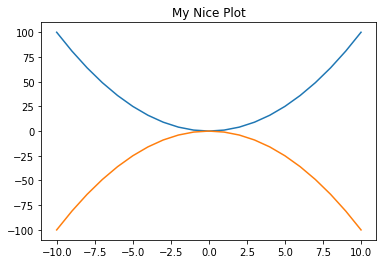

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('My Nice Plot')
plt.plot(x, x**2)
plt.plot(x, -1*(x**2));

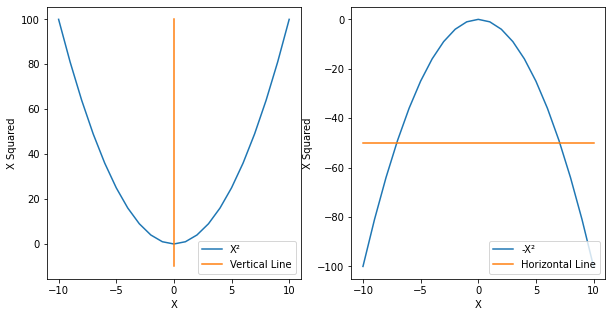

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('My Nice plot')

# left axis
plt.subplot(1, 2, 1) # rows, columns, panel selected
plt.plot(x, x**2, label='X²')
plt.plot([0, 0, 0], [-10, 0, 100], label='Vertical Line')
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylabel('X Squared')

# right axis
plt.subplot(1, 2, 2)
plt.plot(x, -1*(x**2), label='-X²')
plt.plot([-10, 0, 10], [-50, -50, -50], label='Horizontal Line')
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylabel('X Squared')

plt.show()

## **OOP Interface**

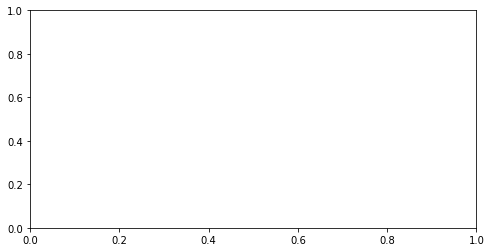

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))

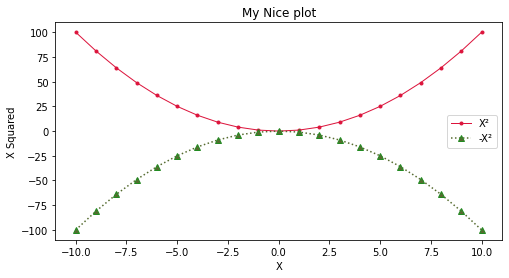

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))

axes.plot(x, (x**2), color='#DC143C', linewidth=1,
          marker='o', markersize=3, label='X²')

axes.plot(x, -1*(x**2), color='#556B2F', linestyle=':',
          marker='^', markeredgecolor='#228B22', label='-X²')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')
axes.set_title('My Nice plot')
axes.legend()
plt.show()

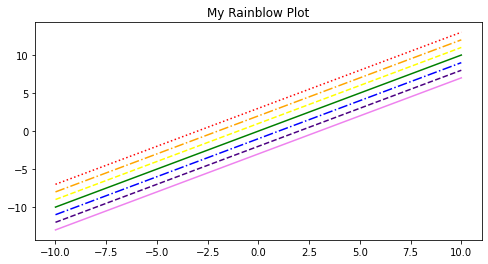

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))

axes.plot(x, x-3, linestyle='-', color='#EE82EE')
axes.plot(x, x-2, linestyle='--', color='#4B0082')
axes.plot(x, x-1, linestyle='-.', color='#0000FF')
axes.plot(x, x+0, linestyle='solid', color='#008000')
axes.plot(x, x+1, linestyle='dashed', color='#FFFF00')
axes.plot(x, x+2, linestyle='dashdot', color='#FFA500')
axes.plot(x, x+3, linestyle='dotted', color='#FF0000')


axes.set_title('My Rainblow Plot')
plt.show()

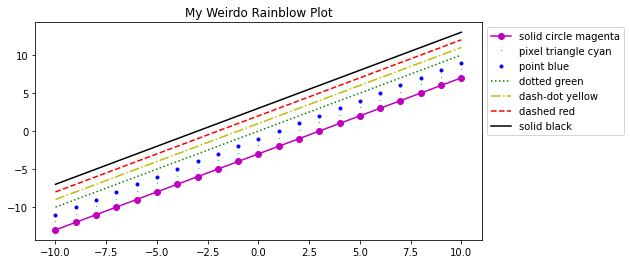

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))


axes.plot(x, x-3, '-om', label='solid circle magenta')
axes.plot(x, x-2, ',c', label='pixel triangle cyan')
axes.plot(x, x-1, '.b', label='point blue')
axes.plot(x, x+0, ':g', label='dotted green')
axes.plot(x, x+1, '-.y', label='dash-dot yellow')
axes.plot(x, x+2, '--r', label='dashed red')
axes.plot(x, x+3, '-k', label='solid black')

axes.set_title("My Weirdo Rainblow Plot")
axes.legend(bbox_to_anchor=(1.0, 1))
plt.show()

There are a lot of line and marker types

In [ ]:
print("Marker: {}".format([m for m in plt.Line2D.markers]))

Marker: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [ ]:
linestyles= ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


## **Other type of plots**

### **Figures and subfigures**

When we call the `subplots()` function we get a tuple containing a figure and a `axes` element.

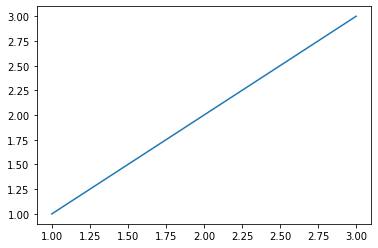

In [ ]:
plot_objects = plt.subplots()
fig, ax = plot_objects
ax.plot([1, 2, 3], [1, 2, 3])
plot_objects;

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

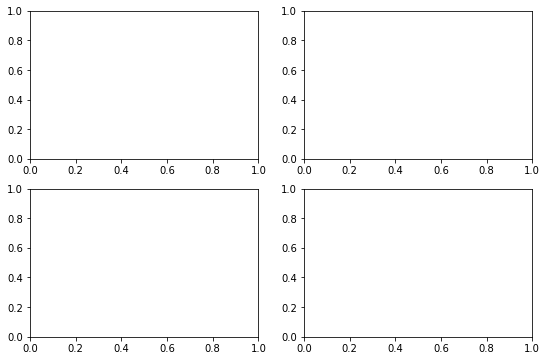

In [ ]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig, ((ax1, ax2,), (ax3, ax4)) = plot_objects
plot_objects;

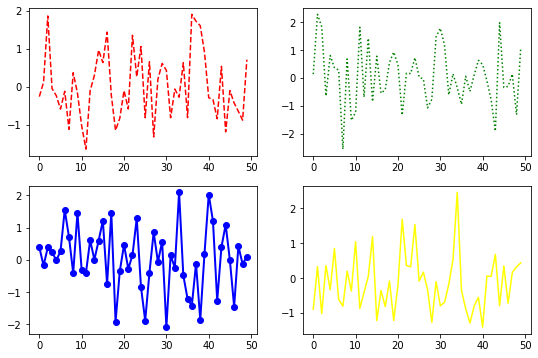

In [ ]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig, ((ax1, ax2,), (ax3, ax4)) = plot_objects

ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=2)

plt.show()

### **The `subplot2grid` command**

There is another way to make subplots using a grid-like format:

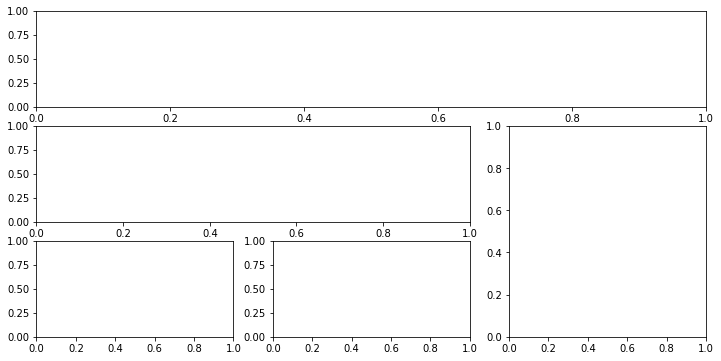

In [ ]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

plt.show()

### **Scatter Plot**

In [ ]:
N = 50 
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi*(20*np.random.rand(N))**2 # 0 to 15 point randii

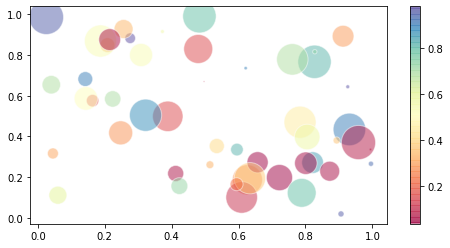

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, s=area, c=colors, edgecolor='#FFFFFF', alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

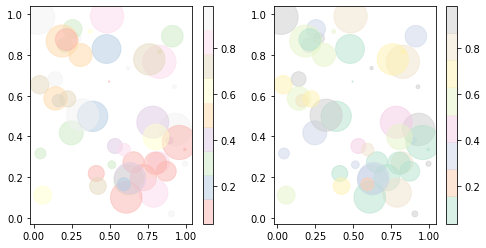

In [ ]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1, 2, 2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

`cmap` options : https://matplotlib.org/2.0.2/users/colormaps.html

### **Histograms**

In [ ]:
values = np.random.randn(1000)

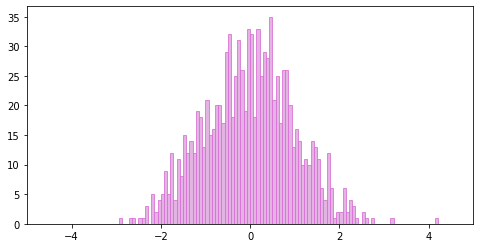

In [ ]:
plt.subplots(figsize=(8, 4))

plt.hist(values, bins=100, alpha=0.8,
         histtype='bar', color='#DDA0DD',
         edgecolor='#DA70D6')

plt.xlim(xmin=-5, xmax=5)
plt.show()

In [ ]:
fig.savefig('hist.png')

### **KDE (kernal density estimation)**

In [ ]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

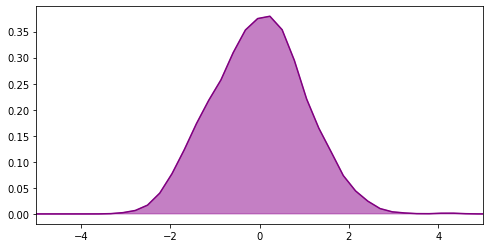

In [ ]:
plt.subplots(figsize=(8, 4))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#800080')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#8B008B')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### **Combine plots**

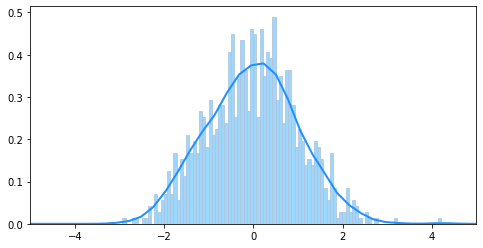

In [ ]:
plt.subplots(figsize=(8, 4))

plt.hist(values, bins=100, alpha=0.8, density=1,
        histtype='bar', color='#87CEFA',
        edgecolor='#B0C4DE')

plt.plot(values2, density(values2), color='#1E90FF', linewidth=2.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### **Bar plots**

In [ ]:
y = np.random.rand(1, 5)[0]
y2 = np.random.rand(1, 5)[0]

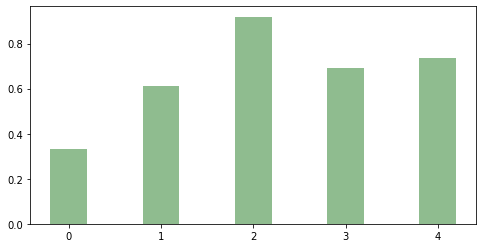

In [ ]:
plt.figure(figsize=(8, 4))

barWidth = 0.4
plt.bar(np.arange(len(y)), y, width=barWidth, color='#8FBC8F')

plt.show()

Also can be stacked bars, and add a legend to the plot:

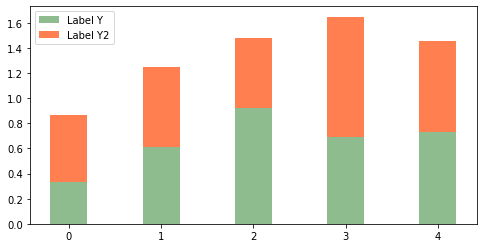

In [ ]:
plt.figure(figsize=(8, 4))

barWidth = 0.4
plt.bar(np.arange(len(y)), y, width=barWidth, color="#8FBC8F", label='Label Y')
plt.bar(np.arange(len(y2)), y2, width=barWidth, color="#FF7F50", bottom=y, label='Label Y2')

plt.legend()
plt.show()

### **Boxplots and Outlier detection**

In [ ]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

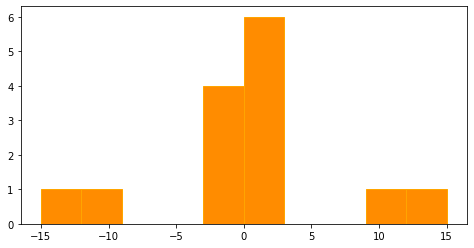

In [ ]:
plt.figure(figsize=(8, 4))

plt.hist(values, color='#FF8C00', edgecolor='#FFA500')
plt.show()

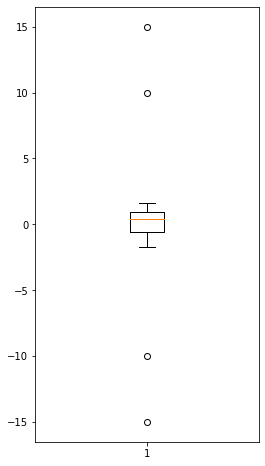

whiskers [<matplotlib.lines.Line2D object at 0x7f59215a6e50>, <matplotlib.lines.Line2D object at 0x7f59215a6e90>]
caps [<matplotlib.lines.Line2D object at 0x7f592109af10>, <matplotlib.lines.Line2D object at 0x7f592109a2d0>]
boxes [<matplotlib.lines.Line2D object at 0x7f5921383a50>]
medians [<matplotlib.lines.Line2D object at 0x7f592109a190>]
fliers [<matplotlib.lines.Line2D object at 0x7f592f310a50>]
means []


In [ ]:
plt.figure(figsize=(4, 8))

x = plt.boxplot(values)
plt.show()

for k,v in x.items():
  print(k, v)

#<center><b>5. Real Example</b></center>

https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/master/data/btc-eth-prices-outliers.csv

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

In [52]:
import requests
from pathlib import Path

data_path = Path("data/")
file_path = data_path / "btc-eth-prices-outliers.csv"

if data_path.is_dir():
  print(f"{data_path} directory already exists")
else:
  print(f"{data_path} does not exist, make one...")
  data_path.mkdir(parents=True, exist_ok=True)

if not file_path.is_file():
  with open(file_path, "wb" ) as f:
    request = requests.get("https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/master/data/btc-eth-prices-outliers.csv")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{file_path} already exists")


data does not exist, make one...


In [53]:
import pandas as pd

df = pd.read_csv('data/btc-eth-prices-outliers.csv', 
                 index_col=0,
                 parse_dates=True)

df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


and now we can run a simple visualization:

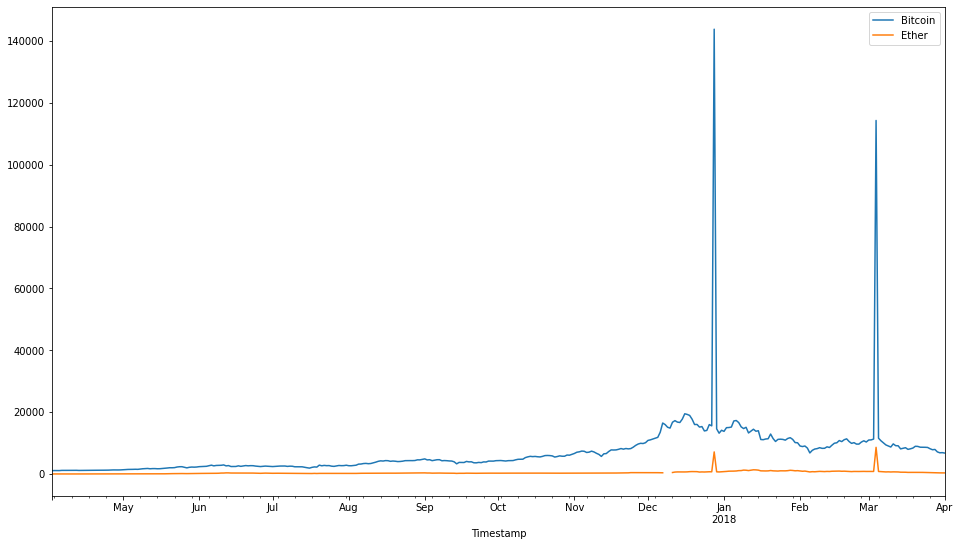

In [54]:
df.plot(figsize=(16, 9));

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between Decenber 2019 and and January 2018:


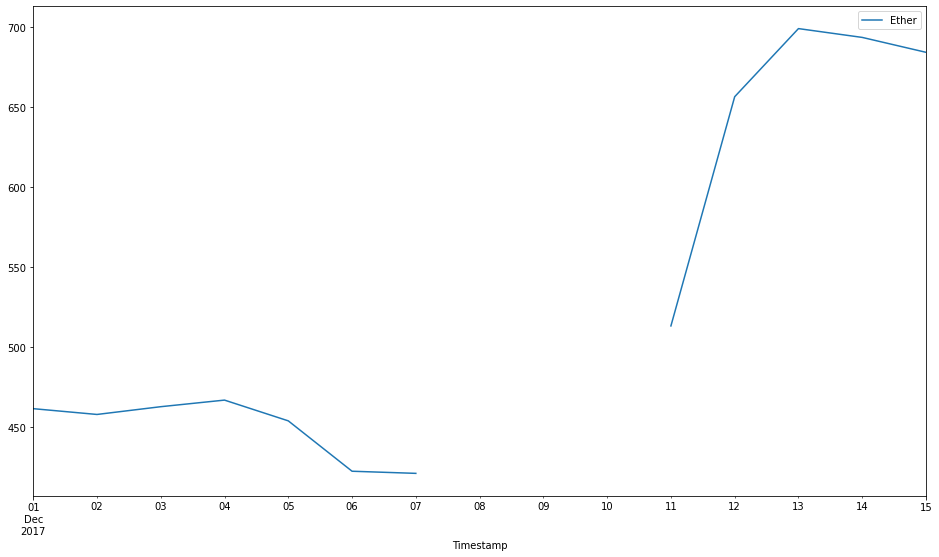

In [55]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9));

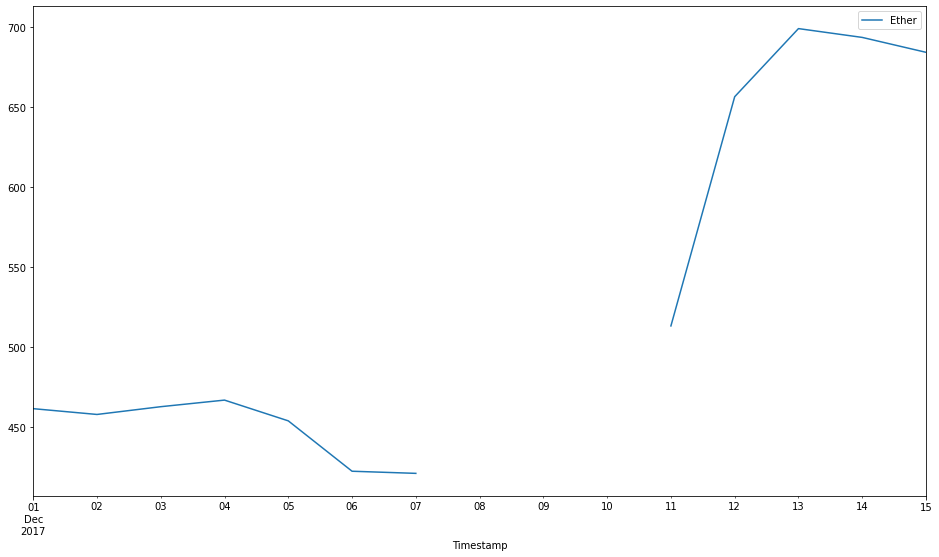

In [56]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9));

In [57]:
df_na = df.loc['2017-12': '2017-12-15']
df_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


Are those null values?

In [58]:
df_na['Ether'].isna().count()

15

In [59]:
df_na['Ether'].isna().values.any()

True

When? what periods of time?

In [60]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [61]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. 

Drop them? fill them? 
if we decide to fill them, what will be use as file values?

For example: we can use the previous value and just assume the price stayed the same.

In [62]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [63]:
df.fillna(method='bfill', inplace=True)

let's take a look now:

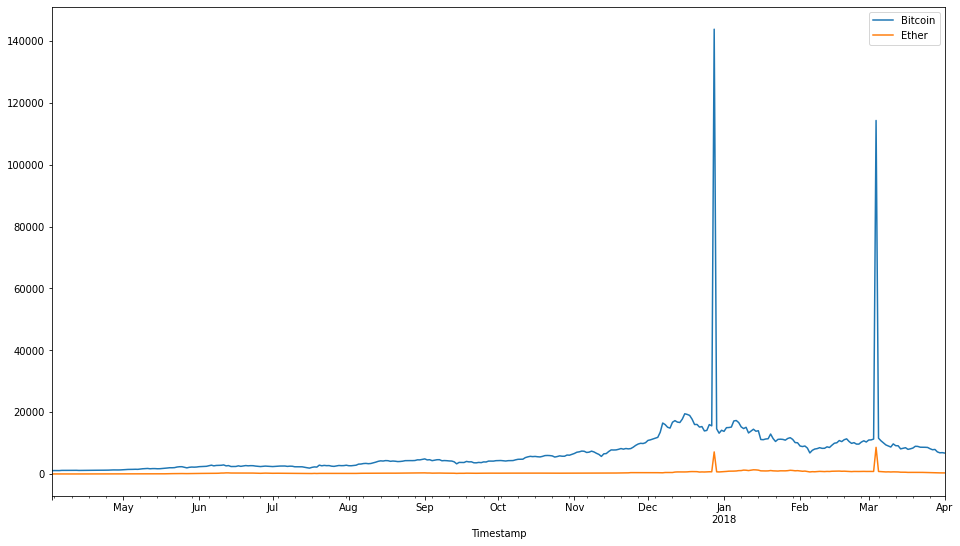

In [64]:
df.plot(figsize=(16, 9));

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it?

The simple answer is course visually. They seem to be located in the last  10 days of Dec 2017 and first of March 2018:

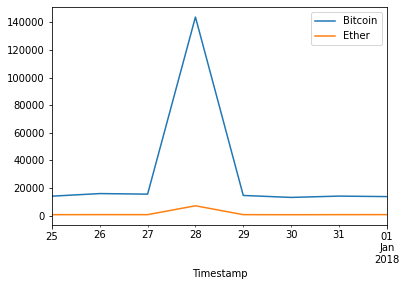

In [65]:
df['2017-12-25':'2018-01-01'].plot();

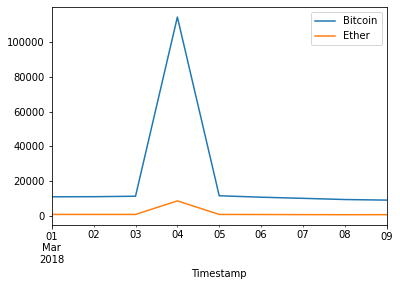

In [66]:
df['2018-03-01': '2018-03-09'].plot();

apprarently, they're located in '2017-12-28' and '2018-03-04':

In [67]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


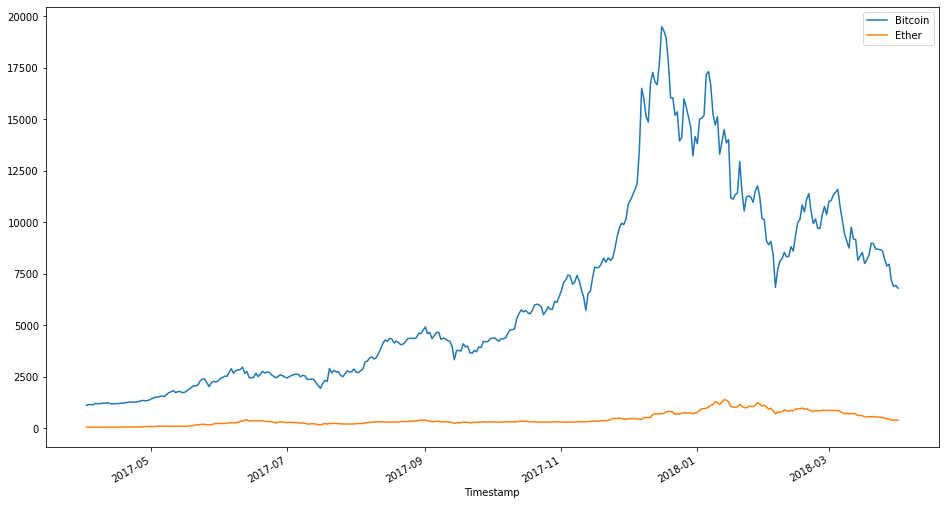

In [68]:
df_cleaned.plot(figsize=(16, 9));

Now it looks much better. Our data seems to be clean.

## **Cleaning Analysis**

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerfull method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

### **Central Tendency**

We'll use a set of common indicators of to measure central tendency and identify these outliers:

**mean**

The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [69]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem too high. That's because the outliers are skewing with the mean:

In [70]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

**median**

In [71]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

**mode**

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with df.mode()

In [72]:
df.mode()

,Bitcoin,Ether
0,1099.169125,513.29
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


### **Visualizing distribution**

Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms:**

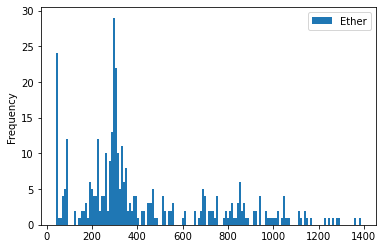

In [73]:
df_cleaned.plot(kind='hist', y='Ether', bins=150);

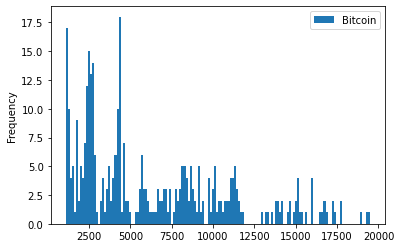

In [75]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150);

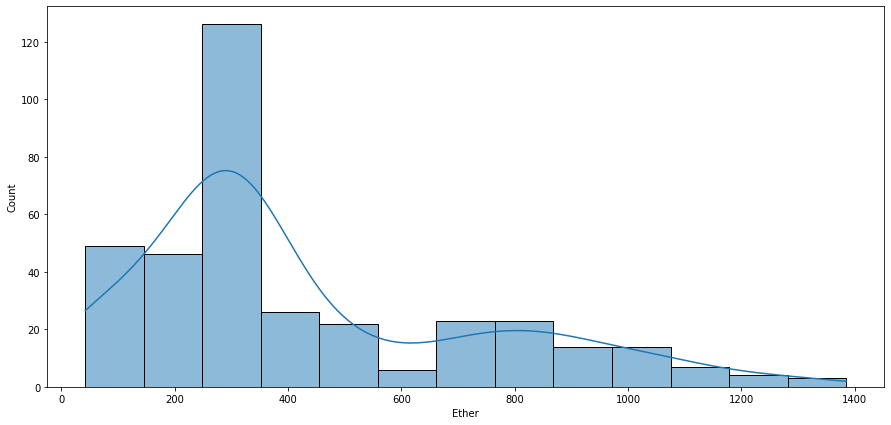

In [101]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['Ether'], kde=True);

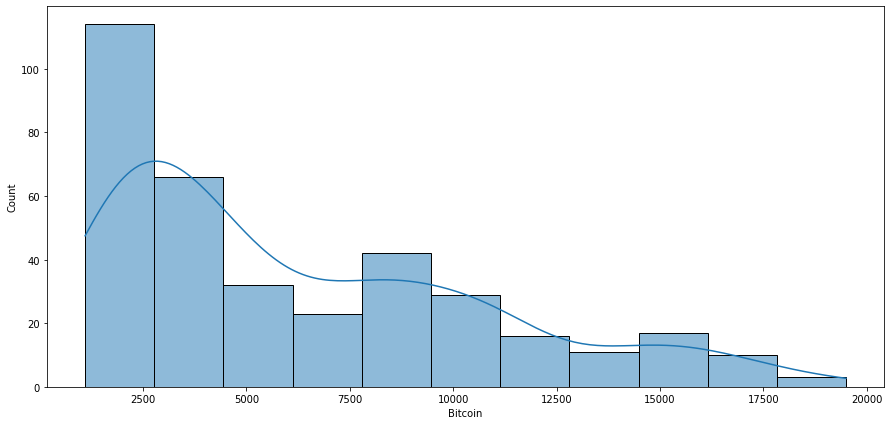

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['Bitcoin'], kde=True);

Seaborn's `distplot` deprecated: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

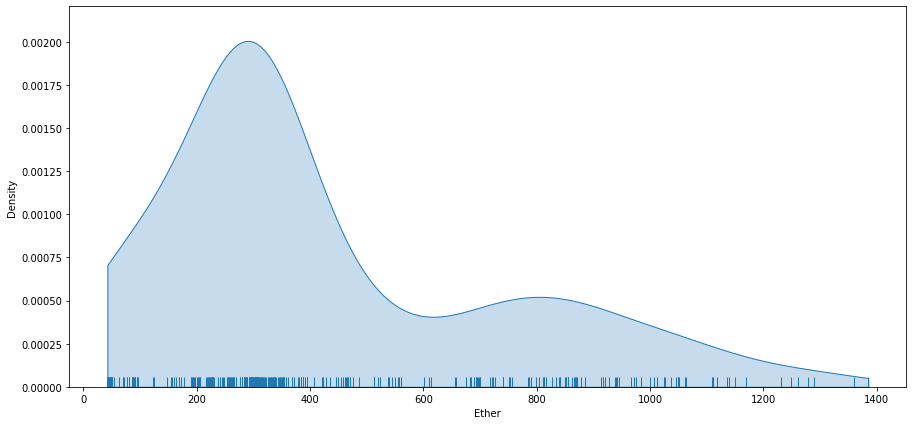

In [105]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

We can also visualize a cumulative plot of our distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


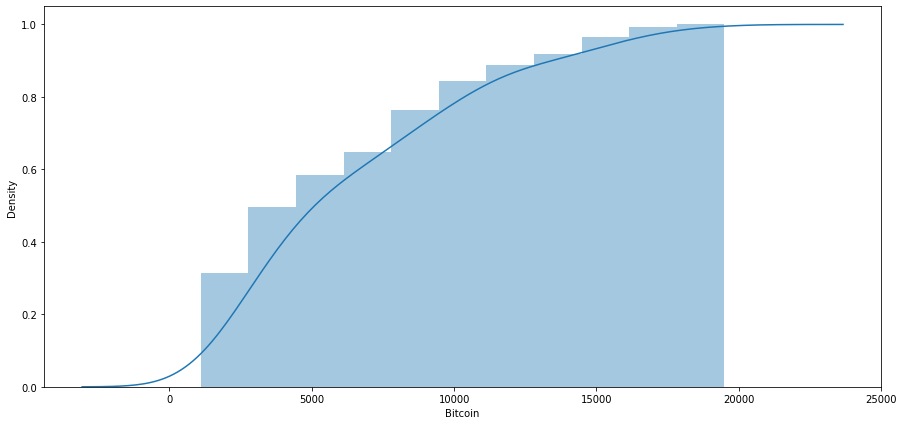

In [120]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True)
            );

This plots how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


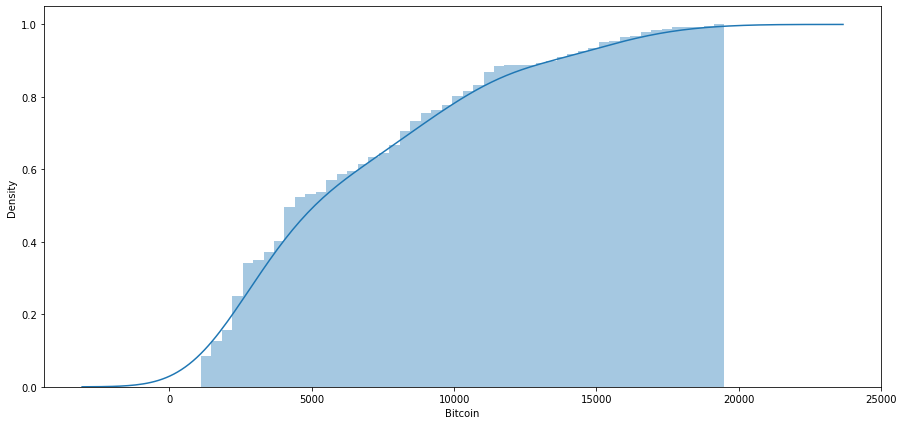

In [123]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True));

### **Visualizing bivariate distributions**


The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:

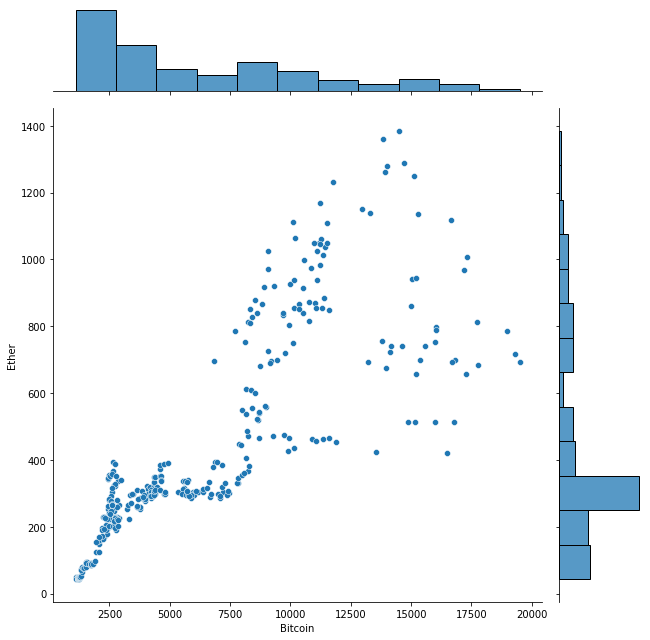

In [126]:
sns.jointplot(x='Bitcoin', y='Ether', data=df_cleaned, height=9);

If you want only a scatter plot, you can use the `replot` method, that also fits a linear regression model in the plot:

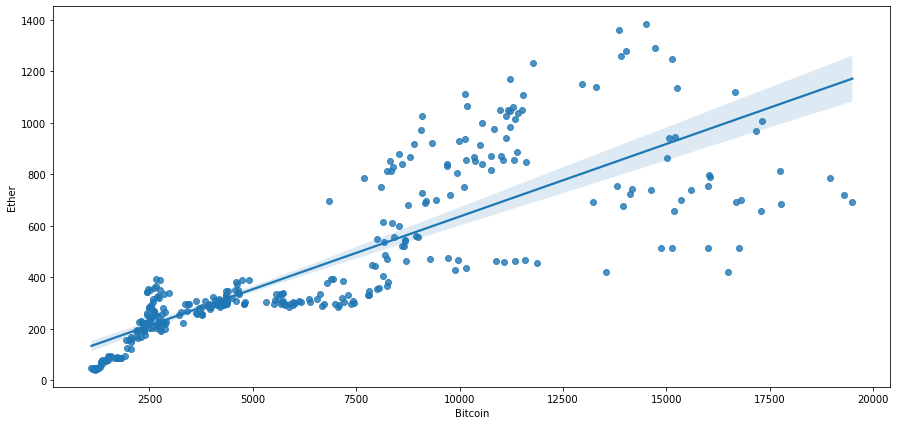

In [127]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='Bitcoin', y='Ether', data=df_cleaned, ax=ax );

### **Position: Qurtiles and Percentiles**

In [128]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


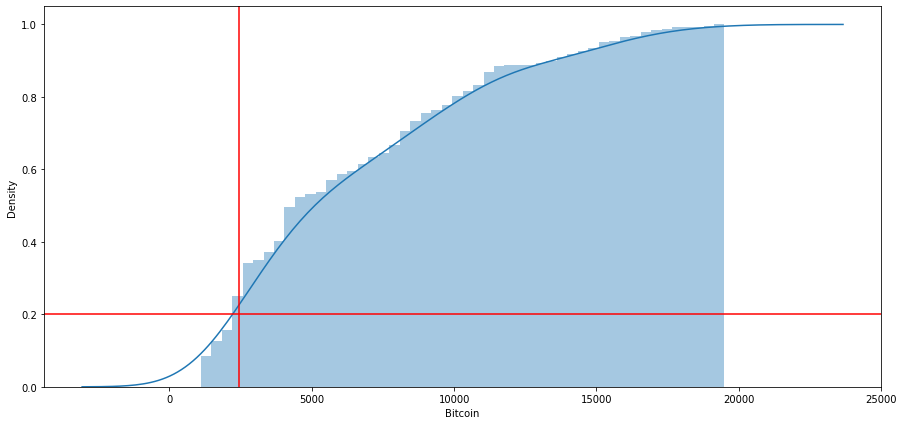

In [131]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red');

In [134]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [135]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


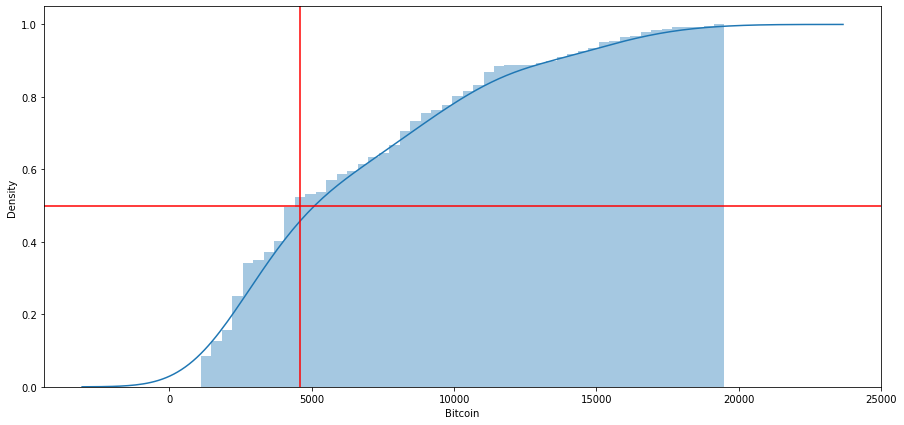

In [136]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


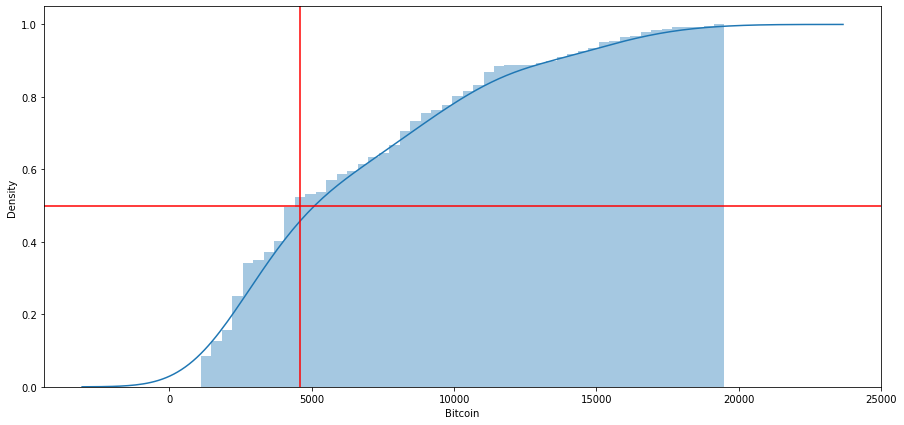

In [139]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red');

Quantile `0.25` = Percentile `25%` = Quartile '1st'

### **Dispersion**

We'll use a few methods to measure dispersion in our dataset, most of them well known:
* Range (Max - Min)
* Variance (Var, SD<sup>2</sup>) and Standard Deviation (SD)
* IQR (Interquartile range: Q<sub>3</sub>-Q<sub>1</sub>)

#### **Range**

range is fairly simple to understand, it's just the max - min Values:

In [140]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is **really** sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [142]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

#### **Variance and Standard Deviation**

In [143]:
df['Bitcoin'].var()

103766537.75278121

In [144]:
df['Bitcoin'].std()

10186.586167739475

Both variance and standard diviation are sensible to outliers as well. We can check with our cleaned dataset:

In [145]:
df_cleaned['Bitcoin'].std()

4513.757662530282

#### **IQR**

The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as Q<sub>3</sub> - Q<sub>1</sub> (3rd quartile - 1st quartile)

In [146]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [147]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or rannge, because it's not so sensitive to outliers.

### **Analytical Analysis of invalid values**

We can now use the measurements we've seen to analyze those values that seem invalid,

**Using `std`: Z scores**

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [149]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


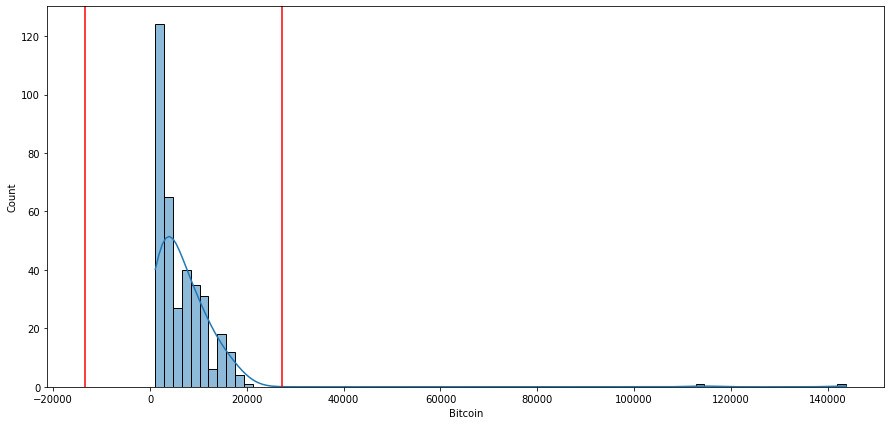

In [156]:
fit, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df['Bitcoin'], kde=True)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red');

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anythoing about $27,369 is considered to be an invalid value. Pretty accurate.

**Using IQRs**

We can use the IQR instead of std if we think that the standard deviation might be **too** affected by the outliers/invalid values.

In [157]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [158]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


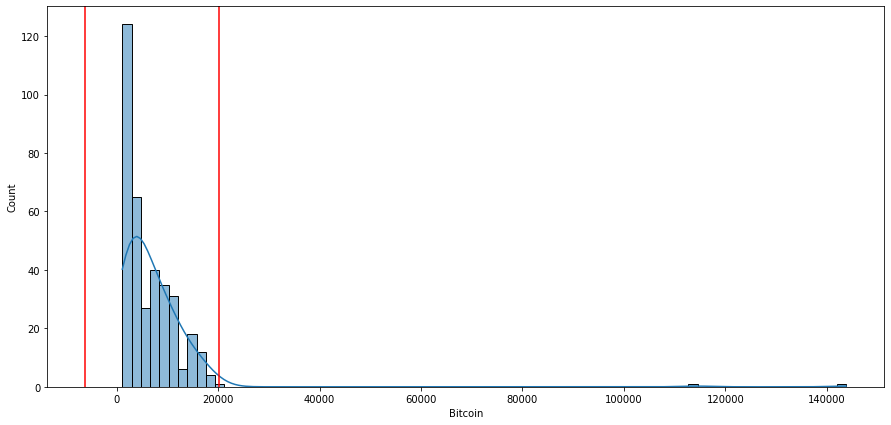

In [160]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df['Bitcoin'], kde=True)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red');

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's till a good indicator.

### **Cleaning invalid values analytically**

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [161]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

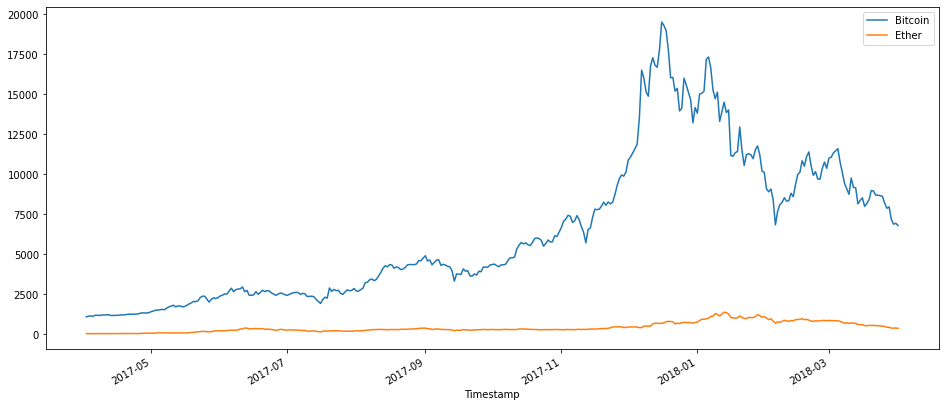

In [163]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7));

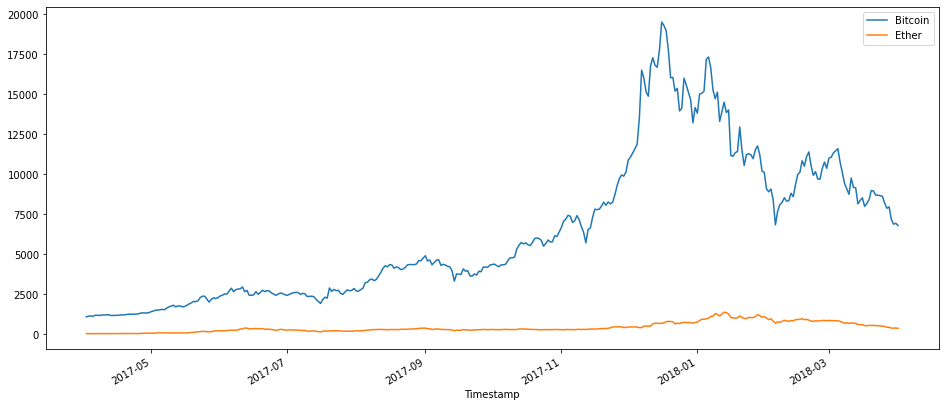

In [164]:
df.drop(df[df['Bitcoin']> upper_limit].index).plot(figsize=(16, 7));

#<b>Reference</b>

Santiago Basulto.*data-cleaning-rmotr-freecodecamp.*https://github.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp

Safa Mulani.*How to compare Two lists in Python.* https://www.digitalocean.com/community/tutorials/how-to-compare-two-lists-in-python